<a href="https://colab.research.google.com/github/jonesmaXd/machine_learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#printing the shapes of the vectors 
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


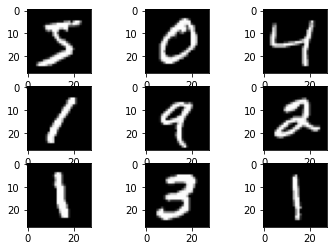

In [ ]:
#Plot samples of numbers from 1-9
for i in range(9):  
  plt.subplot(330 + 1 + i) 
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#3 Different local datasets
#They are categorized by the number in the image from 0-2, 3-5, and 6-9.

y_train_0_2 = np.array([y_train[i] for i in range(len(y_train)) if y_train[i] < 3])
y_train_3_5 = np.array([y_train[i] for i in range(len(y_train)) if y_train[i] > 2 and y_train[i] < 6])
y_train_6_9 = np.array([y_train[i] for i in range(len(y_train)) if y_train[i] > 5])

y_test_0_2 = np.array([y_test[i] for i in range(len(y_test)) if y_test[i] < 3])
y_test_3_5 = np.array([y_test[i] for i in range(len(y_test)) if y_test[i] > 2 and y_test[i] < 6])
y_test_6_9 = np.array([y_test[i] for i in range(len(y_test)) if y_test[i] > 5])

X_train_0_2 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] < 3])
X_train_3_5 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] > 2 and y_train[i] < 6])
X_train_6_9 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] > 5])

X_test_0_2 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] < 3])
X_test_3_5 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] > 2 and y_test[i] < 6])
X_test_6_9 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] > 5])

In [ ]:
#Print the shape of the datasets
print("X_train_0_2 shape: ", X_train_0_2.shape) 
print("y_train_0_2 shape: ", y_train_0_2.shape) 
print("X_test_0_2 shape: ", X_test_0_2.shape) 
print("y_test_0_2 shape: ", y_test_0_2.shape)

print("X_train_3_5 shape: ", X_train_3_5.shape)
print("y_train_3_5 shape: ", y_train_3_5.shape)
print("X_test_3_5 shape: ", X_test_3_5.shape)
print("y_test_3_5 shape: ", y_test_3_5.shape)

print("X_train_6_9 shape: ", X_train_6_9.shape)
print("y_train_6_9 shape: ", y_train_6_9.shape)
print("X_test_6_9 shape: ", X_test_6_9.shape)
print("y_test_6_9 shape: ", y_test_6_9.shape)

X_train_0_2 shape:  (18623, 28, 28)
y_train_0_2 shape:  (18623,)
X_test_0_2 shape:  (3147, 28, 28)
y_test_0_2 shape:  (3147,)
X_train_3_5 shape:  (17394, 28, 28)
y_train_3_5 shape:  (17394,)
X_test_3_5 shape:  (2884, 28, 28)
y_test_3_5 shape:  (2884,)
X_train_6_9 shape:  (23983, 28, 28)
y_train_6_9 shape:  (23983,)
X_test_6_9 shape:  (3969, 28, 28)
y_test_6_9 shape:  (3969,)


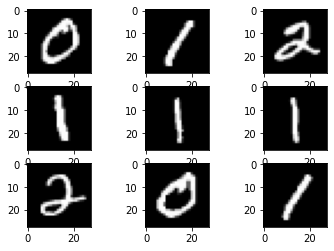

In [ ]:
#Verify that the dataset only contains numbers from 0-2
for i in range(9):  
  plt.subplot(330 + 1 + i) 
  plt.imshow(X_train_0_2[i], cmap=plt.get_cmap('gray'))
plt.show()

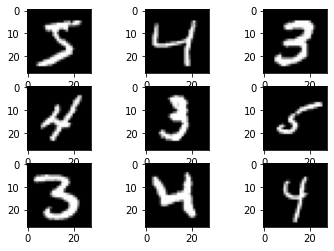

In [ ]:
#Verify that the dataset only contains numbers from 3-5
for i in range(9):  
  plt.subplot(330 + 1 + i) 
  plt.imshow(X_train_3_5[i], cmap=plt.get_cmap('gray'))
plt.show()

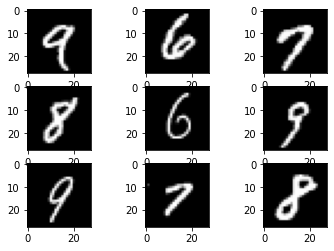

In [ ]:
#Verify that the dataset only contains numbers from 6-9
for i in range(9):  
  plt.subplot(330 + 1 + i) 
  plt.imshow(X_train_6_9[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#Reshape data from 3d to 2d, so it can be used in a model 
X_train = X_train.reshape(60000,28*28)
X_train = X_train.astype('float32')/255
X_test = X_test.reshape(10000,28*28)
X_test = X_test.astype('float32')/255

X_train_0_2 = X_train_0_2.reshape(18623,28*28)
X_train_0_2 = X_train_0_2.astype('float32')/255
X_test_0_2 = X_test_0_2.reshape(3147,28*28)
X_test_0_2 = X_test_0_2.astype('float32')/255


X_train_3_5 = X_train_3_5.reshape(17394,28*28)
X_train_3_5 = X_train_3_5.astype('float32')/255
X_test_3_5 = X_test_3_5.reshape(2884,28*28)
X_test_3_5 = X_test_3_5.astype('float32')/255

X_train_6_9 = X_train_6_9.reshape(23983,28*28)
X_train_6_9 = X_train_6_9.astype('float32')/255
X_test_6_9 = X_test_6_9.reshape(3969,28*28)
X_test_6_9 = X_test_6_9.astype('float32')/255

In [ ]:
#Multilayer perceptron for the full dataset
MLP_model_full_set = MLPClassifier(solver='sgd', activation='logistic',alpha=1e-4,hidden_layer_sizes=(100,30),
                    random_state=1, max_iter=100,verbose=True, learning_rate_init=.1, tol=1e-4)
MLP_model_full_set.fit(X_train, y_train)
accuracy_score = MLP_model_full_set.score(X_test, y_test)

print(accuracy_score)

Iteration 1, loss = 1.14375834
Iteration 2, loss = 0.33787392
Iteration 3, loss = 0.25119173
Iteration 4, loss = 0.20038458
Iteration 5, loss = 0.16473275
Iteration 6, loss = 0.13786252
Iteration 7, loss = 0.11867794
Iteration 8, loss = 0.10371738
Iteration 9, loss = 0.09222830
Iteration 10, loss = 0.08235222
Iteration 11, loss = 0.07482807
Iteration 12, loss = 0.06700804
Iteration 13, loss = 0.06103332
Iteration 14, loss = 0.05569151
Iteration 15, loss = 0.05137623
Iteration 16, loss = 0.04693709
Iteration 17, loss = 0.04291575
Iteration 18, loss = 0.03968209
Iteration 19, loss = 0.03648449
Iteration 20, loss = 0.03332570
Iteration 21, loss = 0.03082992
Iteration 22, loss = 0.02806604
Iteration 23, loss = 0.02616177
Iteration 24, loss = 0.02401018
Iteration 25, loss = 0.02225455
Iteration 26, loss = 0.02085409
Iteration 27, loss = 0.01876685
Iteration 28, loss = 0.01721190
Iteration 29, loss = 0.01640115
Iteration 30, loss = 0.01502333
Iteration 31, loss = 0.01394246
Iteration 32, los

In [ ]:
#SVM model for 0-2 range
SVM_model = svm.SVC()
SVM_model.fit(X_train_0_2, y_train_0_2)
SVM_accuracy = SVM_model.score(X_test_0_2, y_test_0_2)
print(SVM_accuracy)

0.9955513187162377


In [ ]:
#K-nearest-neighbors model for 3-5 range
KNC_model = KNeighborsClassifier()
KNC_model.fit(X_train_3_5, y_train_3_5)
KNC_accuracy = KNC_model.score(X_test_3_5, y_test_3_5)
print(KNC_accuracy)

0.9899445214979196


In [ ]:
#Mulilayer perceptron model for 6-9 range
MLP_model_local = MLPClassifier(solver='sgd', activation='logistic',alpha=1e-4,hidden_layer_sizes=(100,30),
                    random_state=1, max_iter=100,verbose=True, learning_rate_init=.1, tol=1e-4)
MLP_model_local.fit(X_train_6_9, y_train_6_9)
MLP_local_accuracy = MLP_model_local.score(X_test_6_9, y_test_6_9) 
print(MLP_local_accuracy)

Iteration 1, loss = 0.74349494
Iteration 2, loss = 0.16137489
Iteration 3, loss = 0.12632902
Iteration 4, loss = 0.11183600
Iteration 5, loss = 0.09900619
Iteration 6, loss = 0.08743075
Iteration 7, loss = 0.07859166
Iteration 8, loss = 0.07032455
Iteration 9, loss = 0.06430310
Iteration 10, loss = 0.05931616
Iteration 11, loss = 0.05424085
Iteration 12, loss = 0.04952364
Iteration 13, loss = 0.04609575
Iteration 14, loss = 0.04292483
Iteration 15, loss = 0.03902486
Iteration 16, loss = 0.03642933
Iteration 17, loss = 0.03367433
Iteration 18, loss = 0.03121537
Iteration 19, loss = 0.02890224
Iteration 20, loss = 0.02692658
Iteration 21, loss = 0.02481989
Iteration 22, loss = 0.02296199
Iteration 23, loss = 0.02166480
Iteration 24, loss = 0.01983127
Iteration 25, loss = 0.01919644
Iteration 26, loss = 0.01703351
Iteration 27, loss = 0.01604712
Iteration 28, loss = 0.01490075
Iteration 29, loss = 0.01365726
Iteration 30, loss = 0.01286806
Iteration 31, loss = 0.01168164
Iteration 32, los

In [ ]:
#Defines a global model using enseble learning
#It combines the three local models created and uses hard voting
Global_model = VotingClassifier(
    estimators=[('SVM', SVM_model), ('KNC', KNC_model), ('MLP', MLP_model_local)], voting='hard')

In [ ]:
#Fits the global model with training data
#Takes some minutes to compute
Global_model.fit(X_train, y_train)
Global_accuracy = Global_model.score(X_test, y_test)
print(Global_accuracy)

Iteration 1, loss = 1.14375834
Iteration 2, loss = 0.33787392
Iteration 3, loss = 0.25119173
Iteration 4, loss = 0.20038458
Iteration 5, loss = 0.16473275
Iteration 6, loss = 0.13786252
Iteration 7, loss = 0.11867794
Iteration 8, loss = 0.10371738
Iteration 9, loss = 0.09222830
Iteration 10, loss = 0.08235222
Iteration 11, loss = 0.07482807
Iteration 12, loss = 0.06700804
Iteration 13, loss = 0.06103332
Iteration 14, loss = 0.05569151
Iteration 15, loss = 0.05137623
Iteration 16, loss = 0.04693709
Iteration 17, loss = 0.04291575
Iteration 18, loss = 0.03968209
Iteration 19, loss = 0.03648449
Iteration 20, loss = 0.03332570
Iteration 21, loss = 0.03082992
Iteration 22, loss = 0.02806604
Iteration 23, loss = 0.02616177
Iteration 24, loss = 0.02401018
Iteration 25, loss = 0.02225455
Iteration 26, loss = 0.02085409
Iteration 27, loss = 0.01876685
Iteration 28, loss = 0.01721190
Iteration 29, loss = 0.01640115
Iteration 30, loss = 0.01502333
Iteration 31, loss = 0.01394246
Iteration 32, los

In [ ]:
#Confusion matrix

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

def cm(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

<Figure size 432x288 with 0 Axes>

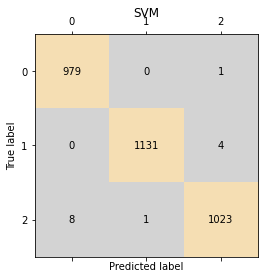

<Figure size 432x288 with 0 Axes>

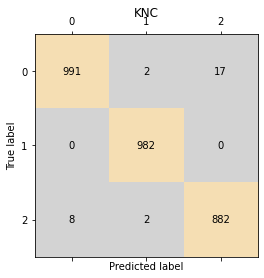

<Figure size 432x288 with 0 Axes>

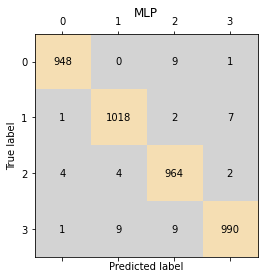

<Figure size 432x288 with 0 Axes>

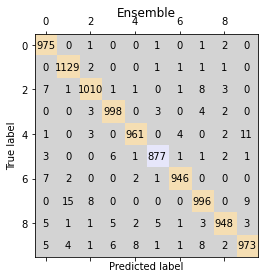

<Figure size 432x288 with 0 Axes>

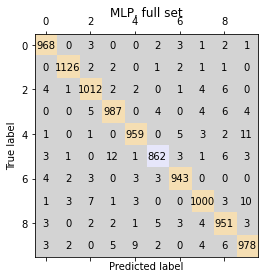

In [ ]:
#Confusion matrix for all models
cm(y_test_0_2, SVM_model.predict(X_test_0_2), title="SVM")
cm(y_test_3_5, KNC_model.predict(X_test_3_5), title="KNC")
cm(y_test_6_9, MLP_model_local.predict(X_test_6_9), title="MLP")
cm(y_test, Global_model.predict(X_test), title="Ensemble")
cm(y_test, MLP_model_full_set.predict(X_test), title="MLP, full set")

In [ ]:
#Precision for all models
Precision_0_2 = precision_score(y_test_0_2, SVM_model.predict(X_test_0_2), average='micro')
print('SVM precision score                    : ', Precision_0_2)
Precision_3_5 = precision_score(y_test_3_5, KNC_model.predict(X_test_3_5), average='micro')
print('KNC precision score                    : ', Precision_3_5)
Precision_6_9 = precision_score(y_test_6_9, MLP_model_local.predict(X_test_6_9), average='micro')
print('MLP precision score                    : ', Precision_6_9)
Precision_global = precision_score(y_test, Global_model.predict(X_test), average='micro')
print('Enseble precision score                : ', Precision_global)
Precision_full_set = precision_score(y_test, MLP_model_full_set.predict(X_test), average='micro')
print('MLP on complete dataset precision score: ', Precision_full_set)

SVM precision score                    :  0.9955513187162377
KNC precision score                    :  0.9899445214979196
MLP precision score                    :  0.9876543209876543
Enseble precision score                :  0.9813
MLP on complete dataset precision score:  0.9786


In [ ]:
#Recall for all models
Recall_0_2 = recall_score(y_test_0_2, SVM_model.predict(X_test_0_2), average='micro')
print('SVM recall score                    : ', Recall_0_2)
Recall_3_5 = recall_score(y_test_3_5, KNC_model.predict(X_test_3_5), average='micro')
print('KNC recall score                    : ', Recall_3_5)
Recall_6_9 = recall_score(y_test_6_9, MLP_model_local.predict(X_test_6_9), average='micro')
print('MLP recall score                    : ' ,Recall_6_9)
Recall_global = recall_score(y_test, Global_model.predict(X_test), average='micro')
print('Enseble recall score                : ', Recall_global)
Recall_full_set = recall_score(y_test, MLP_model_full_set.predict(X_test), average='micro')
print('MLP on complete dataset recall score: ', Recall_full_set)

SVM recall score                    :  0.9955513187162377
KNC recall score                    :  0.9899445214979196
MLP recall score                    :  0.9876543209876543
Enseble recall score                :  0.9813
MLP on complete dataset recall score:  0.9786


The MNIST is a dataset of handwritten digits. It contains 60.000 examples for training, and 10.000 examples for testing. The handwritten digits naturally range from 0-9, and are balanced - (but not perfect) in their distribution. 

The dataset is split into 3 sub-sets:
from 0-2, 3-5 and 6-9.

These subsets are fitted to different models: 
the 0-2 set is fitted to a Support Vector Machine(SVM).

the 3-5 set is fitted to K-nearest-neighbour algorithm (KNC - KNeighborsClassifier).

the 6-9 is fitted to a multilayer perceptron neural network(MLP).

These are all combined into a global model using ensemble learning and hard voting.

Finally, the full dataset is fitted to the same multilayer perceptron model as the 6-9 dataset. 


**Results**

All of the models got the same score on the precision and recall calculations


*   SVM: 0.9955513187162377
*   KNC: 0.9899445214979196
*   MLP: 0.9876543209876543
*   Ensemble: 0.9813
*   MLP on full set: 0.9786

**Remarks**

All of the models display the ability of providing high accuracy, with the highest loss being ~2% of the full set. There in general is a very small difference between the pick of models, but it is evident that SVM performs the best. 

The Global model recieved a lower accuracy than all of the local models, this could be a factor of numerous reasons. In general the global model, being an ensemble algorithm, is more recillient to different inputs, one submodel underperforming, and noise and bias. This is due to it consisting of multiple models.


It should be noted that using different models on the subsets is not adviced, as it makes it harder to draw reasonable comparisons between the models. This is due to not knowing if it is the model or the actual handwritten letters that cause a deviation between the subsets. Tuning of the model and type of the model can also impact the result. The reason it was used in this exercise is simply for learning more about using different models. It was also necessary in order to create an ensemble model. 



